In [1]:
import pandas as pd

## Get measurements from CSV

In [2]:
sensor_readings = pd.read_csv("D:\Master\Thesis\Code\L-Town\measurements_LTown.csv", index_col = 0)

sensor_readings['Timestamp'] = pd.to_datetime(sensor_readings['Timestamp'])

# Extract entity ID and type
sensor_readings['entity_id'] = sensor_readings['sensor_id'].apply(lambda x: "_".join(x.split("_")[:2]))  
sensor_readings['measurement_type'] = sensor_readings['sensor_type']  # demand, pressure, flow
sensor_readings['entity_type'] = sensor_readings['entity_id'].apply(lambda x: x.split("_")[0])  # Node or Pipe


In [33]:
sensor_readings["measurement_type"].unique()

array(['demand', 'flow', 'level', 'pressure'], dtype=object)

In [34]:
sensor_readings

,Timestamp,sensor_id,measurement,sensor_type,unique_id,entity_id,measurement_type,entity_type
0,2018-01-01 00:00:00,n1_demand,41.801667,demand,n1_demand_2018-01-01 00:00:00,n1_demand,demand,n1
1,2018-01-01 00:30:00,n1_demand,37.711667,demand,n1_demand_2018-01-01 00:30:00,n1_demand,demand,n1
2,2018-01-01 01:00:00,n1_demand,37.425000,demand,n1_demand_2018-01-01 01:00:00,n1_demand,demand,n1
3,2018-01-01 01:30:00,n1_demand,41.076667,demand,n1_demand_2018-01-01 01:30:00,n1_demand,demand,n1
4,2018-01-01 02:00:00,n1_demand,39.751667,demand,n1_demand_2018-01-01 02:00:00,n1_demand,demand,n1
...,...,...,...,...,...,...,...,...
5326075,2018-12-31 23:35:00,n769_pressure,48.330000,pressure,n769_pressure_2018-12-31 23:35:00,n769_pressure,pressure,n769
5326076,2018-12-31 23:40:00,n769_pressure,48.330000,pressure,n769_pressure_2018-12-31 23:40:00,n769_pressure,pressure,n769
5326077,2018-12-31 23:45:00,n769_pressure,48.360000,pressure,n769_pressure_2018-12-31 23:45:00,n769_pressure,pressure,n769
5326078,2018-12-31 23:50:00,n769_pressure,48.320000,pressure,n769_pressure_2018-12-31 23:50:00,n769_pressure,pressure,n769


In [35]:
# Nodes → demand
demands_df = sensor_readings[sensor_readings['measurement_type'] == 'demand']
demands_all = demands_df.pivot_table(index='Timestamp', columns=['entity_type'], values='measurement')

In [36]:
demands_all

entity_type,n1,n10,n11,n13,n16,n17,n18,n19,n2,n20,...,n40,n41,n42,n43,n44,n45,n6,n7,n8,n9
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,41.801667,42.246667,252.763333,169.983333,61.173333,268.900000,46.381667,95.145000,112.651667,106.310000,...,210.528333,89.528333,133.441667,74.175000,25.051667,217.703333,177.465000,255.903333,231.466667,262.408333
2018-01-01 00:30:00,37.711667,42.080000,272.173333,101.300000,40.010000,204.651667,42.625000,75.115000,83.136667,66.536667,...,151.203333,83.045000,123.778333,51.951667,18.488333,136.255000,135.065000,210.073333,126.196667,212.028333
2018-01-01 01:00:00,37.425000,23.261667,189.163333,91.825000,36.916667,196.053333,23.851667,51.430000,46.375000,56.936667,...,126.426667,54.695000,81.520000,48.276667,10.311667,116.596667,129.391667,165.678333,116.610000,133.613333
2018-01-01 01:30:00,41.076667,22.885000,189.800000,43.513333,34.856667,145.695000,28.040000,32.316667,51.645000,44.796667,...,57.490000,42.215000,62.923333,33.740000,11.483333,91.736667,96.156667,120.151667,115.490000,92.256667
2018-01-01 02:00:00,39.751667,14.896667,126.500000,53.878333,34.081667,90.496667,13.090000,17.340000,40.926667,41.073333,...,91.510000,48.531667,72.335000,23.166667,9.100000,84.108333,59.726667,54.741667,76.676667,99.265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,214.273333,110.821667,514.861667,238.323333,87.590000,413.788333,62.458333,115.005000,130.740000,155.675000,...,294.626667,144.903333,215.978333,161.385000,29.076667,318.801667,273.091667,534.883333,394.745000,442.275000
2018-12-31 22:00:00,115.246667,105.376667,393.791667,217.011667,58.318333,468.473333,52.306667,97.768333,170.505000,108.668333,...,336.743333,111.061667,165.533333,93.121667,37.916667,222.533333,309.181667,431.168333,322.828333,519.708333
2018-12-31 22:30:00,100.130000,93.946667,463.678333,176.165000,115.300000,317.785000,57.188333,92.020000,215.485000,142.785000,...,350.755000,149.801667,223.280000,145.436667,47.916667,292.401667,209.728333,262.151667,309.735000,506.728333


### Separate data by feature

## Imputation

### Split train/val, and scale

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import joblib

def split_scale(measurements, feature, cluster):

    # Step 1: Split the full data into train and validation sets
    X_train_full, X_val_full = train_test_split(measurements, test_size=0.2, shuffle = False, random_state=42)

    scaler = StandardScaler()

    # Fit and transform training data
    X_train_full_scaled = X_train_full.copy()
    X_train_full_scaled = scaler.fit_transform(X_train_full)
    X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns, index=X_train_full.index)

    # Save scaler with specific name for later rescaling
    joblib.dump(scaler, f"{feature}_scaler_{cluster}.pkl")

    # Now, apply ONLY transformation (not fitting) on val data
    X_val_full_scaled = X_val_full.copy()
    X_val_full_scaled = scaler.transform(X_val_full)
    X_val_full_scaled = pd.DataFrame(X_val_full_scaled, columns=X_val_full.columns, index=X_val_full.index)

    return X_train_full_scaled, X_val_full_scaled, X_train_full, X_val_full

### Select semantically relevant pipes

In [38]:
demands_c0 = demands_all[['n1', 'n10', 'n16', 'n19', 'n2', 'n22', 'n29', 'n3', 'n32', 'n345', 'n346', 'n347', 'n349', 'n350', 'n352', 'n354', 'n357', 'n362', 'n368', 'n371', 'n374', 'n375', 'n376', 'n378', 'n379', 'n382', 'n383', 'n384', 'n41']]
demands_c1 = demands_all[["n11", "n13", "n17", "n355", "n360", "n386", "n388", "n40", "n42", "n45", "n8"]]
demands_c2 = demands_all[['n30', 'n344', 'n351', 'n353', 'n358', 'n36', 'n381', 'n6', 'n7', 'n9']]
demands_c3 = demands_all[["n18", "n20", "n21", "n23", "n24", "n25", "n26", "n27", "n28", "n31", "n33", "n34", "n343", "n35", "n356", "n361", "n364", "n365", "n366", "n367", "n369", "n370", "n372", "n373", "n377", "n385", "n387", "n389", "n39", "n4", "n43", "n44"]]


# Initialize the containers
X_train_full_scaled = {}
X_val_full_scaled = {}
X_train_full_unscaled = {}
X_val_full_unscaled = {}
clusters = [demands_c0, demands_c1, demands_c2, demands_c3, demands_all]

# Iterate over the clusters
for i, flow_cluster in enumerate(clusters):
    X_train_full_scaled[i], X_val_full_scaled[i], X_train_full_unscaled[i], X_val_full_unscaled[i] = split_scale(flow_cluster, "demand", i)


In [39]:
X_train_full_unscaled[1]

entity_type,n11,n13,n17,n355,n360,n386,n388,n40,n42,n45,n8
Timestamp,,,,,,,,,,,
2018-01-01 00:00:00,252.763333,169.983333,268.900000,144.061667,163.010000,178.736667,307.150000,210.528333,133.441667,217.703333,231.466667
2018-01-01 00:30:00,272.173333,101.300000,204.651667,233.173333,117.076667,115.551667,252.593333,151.203333,123.778333,136.255000,126.196667
2018-01-01 01:00:00,189.163333,91.825000,196.053333,182.311667,97.891667,79.065000,205.691667,126.426667,81.520000,116.596667,116.610000
2018-01-01 01:30:00,189.800000,43.513333,145.695000,106.415000,44.513333,107.911667,157.490000,57.490000,62.923333,91.736667,115.490000
2018-01-01 02:00:00,126.500000,53.878333,90.496667,76.330000,70.858333,92.508333,108.628333,91.510000,72.335000,84.108333,76.676667
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-19 21:30:00,567.195000,266.296667,430.823333,515.263333,244.650000,288.431667,443.606667,315.965000,347.305000,186.545000,138.800000
2018-10-19 22:00:00,475.620000,211.653333,432.701667,401.605000,242.830000,307.023333,471.475000,313.611667,260.241667,177.061667,223.646667
2018-10-19 22:30:00,391.000000,170.551667,308.111667,219.138333,248.690000,263.465000,394.298333,321.186667,179.930000,183.028333,252.631667


In [40]:
def sliding_window_3d(data, window_size, stride):
    """
    Converts a long time series [1, T, F] into [N, window_size, F]
    """
    data = data.squeeze(0)  # [T, F]
    total_steps, n_features = data.shape
    windows = []

    for i in range(0, total_steps - window_size + 1, stride):
        window = data[i:i+window_size]
        windows.append(window)

    return np.stack(windows)

### Introduce MCAR Missingness

In [41]:
from pygrinder import mar_logistic

missing_rates = [0.05, 0.2, 0.6, 0.99]

# Training and validation sets for each cluster
X_train_incomplete = {}
X_val_incomplete = {}
train_masks = {}
val_masks = {}
X_train_seq = {}
X_val_seq = {}
train_masks_seq = {}
val_masks_seq = {}

# Full tensors for each cluster
X_train_full_tensor = {}
X_val_full_tensor = {}
X_val_full_seq = {}
X_train_full_seq = {}
X_train_full_unscaled_seq_tensor = {}
X_val_full_unscaled_seq_tensor = {}

# Define sliding window parameters
n_steps = 168 # 3.5 days each window
stride = 48 # 1 day stride

for cluster_id, flow_cluster in enumerate(clusters):
    X_train_incomplete[cluster_id] = {}
    X_val_incomplete[cluster_id] = {}
    train_masks[cluster_id] = {}
    val_masks[cluster_id] = {}
    X_train_seq[cluster_id] = {}
    X_val_seq[cluster_id] = {}
    train_masks_seq[cluster_id] = {}
    val_masks_seq[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)

        # Introduce missingness per cluster & rate
        print(f"Introducing {rate*100}% missingness for cluster {cluster_id} with key {key}")
        X_train_incomplete[cluster_id][key] = mar_logistic(X_train_full_scaled[cluster_id].values, obs_rate = 0.4, missing_rate=rate)
        X_val_incomplete[cluster_id][key] = mar_logistic(X_val_full_scaled[cluster_id].values, obs_rate = 0.4, missing_rate=rate)

        # Masks for missingness
        train_masks[cluster_id][key] = np.isnan(X_train_incomplete[cluster_id][key])
        val_masks[cluster_id][key] = np.isnan(X_val_incomplete[cluster_id][key])

        # Expand dims for batch axis (needed for sliding window)
        X_train_tensor = np.expand_dims(X_train_incomplete[cluster_id][key], axis=0)
        X_val_tensor = np.expand_dims(X_val_incomplete[cluster_id][key], axis=0)
        train_mask_tensor = np.expand_dims(train_masks[cluster_id][key], axis=0)
        val_mask_tensor = np.expand_dims(val_masks[cluster_id][key], axis=0)

        # Sliding window on data
        X_train_seq[cluster_id][key] = sliding_window_3d(X_train_tensor, window_size=n_steps, stride=stride)
        X_val_seq[cluster_id][key] = sliding_window_3d(X_val_tensor, window_size=n_steps, stride=stride)

        # Sliding window on masks
        train_masks_seq[cluster_id][key] = sliding_window_3d(train_mask_tensor, window_size=n_steps, stride=stride)
        val_masks_seq[cluster_id][key] = sliding_window_3d(val_mask_tensor, window_size=n_steps, stride=stride)


    # Expand full training tensors
    X_train_full_tensor[cluster_id] = np.expand_dims(X_train_full_scaled[cluster_id].values, axis = 0)

    # Expand full validation tensors
    X_val_full_tensor[cluster_id] = np.expand_dims(X_val_full_scaled[cluster_id].values, axis = 0)

    # Convert scaled data to tensor
    X_val_full_seq[cluster_id] = sliding_window_3d(X_val_full_tensor[cluster_id], window_size=n_steps, stride=stride)
    X_train_full_seq[cluster_id] = sliding_window_3d(X_train_full_tensor[cluster_id], window_size=n_steps, stride=stride)

    # Convert unscaled data to tensor
    X_train_full_unscaled_values = np.expand_dims(X_train_full_unscaled[cluster_id].values, axis=0)
    X_train_full_unscaled_seq_tensor[cluster_id] = sliding_window_3d(X_train_full_unscaled_values, window_size=n_steps, stride=stride)

    X_val_full_unscaled_values = np.expand_dims(X_val_full_unscaled[cluster_id].values, axis=0)
    X_val_full_unscaled_seq_tensor[cluster_id] = sliding_window_3d(X_val_full_unscaled_values, window_size=n_steps, stride=stride)

Introducing 5.0% missingness for cluster 0 with key 5
Introducing 20.0% missingness for cluster 0 with key 20
Introducing 60.0% missingness for cluster 0 with key 60
Introducing 99.0% missingness for cluster 0 with key 99
Introducing 5.0% missingness for cluster 1 with key 5
Introducing 20.0% missingness for cluster 1 with key 20
Introducing 60.0% missingness for cluster 1 with key 60
Introducing 99.0% missingness for cluster 1 with key 99
Introducing 5.0% missingness for cluster 2 with key 5
Introducing 20.0% missingness for cluster 2 with key 20
Introducing 60.0% missingness for cluster 2 with key 60
Introducing 99.0% missingness for cluster 2 with key 99
Introducing 5.0% missingness for cluster 3 with key 5
Introducing 20.0% missingness for cluster 3 with key 20
Introducing 60.0% missingness for cluster 3 with key 60
Introducing 99.0% missingness for cluster 3 with key 99
Introducing 5.0% missingness for cluster 4 with key 5
Introducing 20.0% missingness for cluster 4 with key 20
In

In [42]:
# Step 3: Prepare the final datasets with 'X' (incomplete) and 'X_ori' (full data)

# 20 percent missing
train_data, val_data = {}, {}

for cluster_id in range(len(clusters)):
    train_data[cluster_id] = {}
    val_data[cluster_id] = {}
    
    for rate in missing_rates:
        key = int(rate * 100)
        
        # Prepare the train and validation data dictionaries for each missing rate
        train_data[cluster_id][key] = {"X": X_train_seq[cluster_id][key]}
        val_data[cluster_id][key] = {"X": X_val_seq[cluster_id][key], "X_ori": X_val_full_seq[cluster_id]}

## BRITS IMputation

In [48]:
from pypots.imputation import BRITS
from pypots.nn.modules.loss import MAE, MSE
from pypots.optim.adam import Adam
import torch

def intialize_BRITS(n_steps, num_features, rnn_hidden_size):

    # Basic configuration
    model = BRITS(
        n_steps=n_steps,
        n_features=num_features,
        rnn_hidden_size=rnn_hidden_size,               # Reasonable hidden size
        batch_size=32,                    # Standard for most datasets
        epochs=25,                       # Higher epochs for better convergence
        patience=5,                      # Early stopping if no improvement
        training_loss=MAE,                # MAE often performs well for imputation
        validation_metric=MSE,           # Use MSE for validation comparison
        optimizer=Adam,                   # Adam optimizer (default)
        num_workers=0,                    # Adjust if using DataLoader with multiprocessing
        device="cuda" if torch.cuda.is_available() else "cpu",  # Use GPU if available
        saving_path="./brits_model",     # Directory to save model checkpoints
        model_saving_strategy="best",    # Save best model only
        verbose=True                      # Print training progress
    )

    return model

In [49]:
models = {}
rnn_hidden = 0
# Initialize and fit BRITS models for each missing rate

for cluster_id in range(len(clusters)):
    print(f"Training BRITS models for cluster {cluster_id}...")
    models[cluster_id] = {}
    for rate in missing_rates:
        print(f"Training model for missing rate {rate} in cluster {cluster_id}...")
        key = int(rate * 100)

        _, n_steps, n_features = train_data[cluster_id][key]["X"].shape
        
        # Reduce complexity of model for less features
        if cluster_id != len(clusters) - 1:
            rnn_hidden = 16
        else:
            rnn_hidden = 32
        
        models[cluster_id][key] = intialize_BRITS(n_steps, n_features, rnn_hidden)
        models[cluster_id][key].fit(train_data[cluster_id][key], val_set=val_data[cluster_id][key])

2025-06-24 23:51:54 [INFO]: Using the given device: cpu
2025-06-24 23:51:54 [INFO]: Model files will be saved to ./brits_model\20250624_T235154
2025-06-24 23:51:54 [INFO]: Tensorboard file will be saved to ./brits_model\20250624_T235154\tensorboard
2025-06-24 23:51:54 [INFO]: Using customized MAE as the training loss function.
2025-06-24 23:51:54 [INFO]: Using customized MSE as the validation metric function.
2025-06-24 23:51:54 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 18,576


Training BRITS models for cluster 0...
Training model for missing rate 0.05 in cluster 0...


2025-06-24 23:52:03 [INFO]: Epoch 001 - training loss (MAE): 1.6298, validation MSE: 0.8784
2025-06-24 23:52:09 [INFO]: Epoch 002 - training loss (MAE): 1.4395, validation MSE: 0.5967
2025-06-24 23:52:15 [INFO]: Epoch 003 - training loss (MAE): 1.2843, validation MSE: 0.4057
2025-06-24 23:52:21 [INFO]: Epoch 004 - training loss (MAE): 1.1236, validation MSE: 0.3083
2025-06-24 23:52:27 [INFO]: Epoch 005 - training loss (MAE): 1.0380, validation MSE: 0.2751
2025-06-24 23:52:33 [INFO]: Epoch 006 - training loss (MAE): 0.9815, validation MSE: 0.2604
2025-06-24 23:52:39 [INFO]: Epoch 007 - training loss (MAE): 0.9051, validation MSE: 0.2492
2025-06-24 23:52:45 [INFO]: Epoch 008 - training loss (MAE): 0.8724, validation MSE: 0.2438
2025-06-24 23:52:50 [INFO]: Epoch 009 - training loss (MAE): 0.8345, validation MSE: 0.2412
2025-06-24 23:52:56 [INFO]: Epoch 010 - training loss (MAE): 0.8003, validation MSE: 0.2378
2025-06-24 23:53:02 [INFO]: Epoch 011 - training loss (MAE): 0.7900, validation 

Training model for missing rate 0.2 in cluster 0...


2025-06-24 23:54:35 [INFO]: Epoch 001 - training loss (MAE): 1.7391, validation MSE: 0.7724
2025-06-24 23:54:42 [INFO]: Epoch 002 - training loss (MAE): 1.5372, validation MSE: 0.5490
2025-06-24 23:54:50 [INFO]: Epoch 003 - training loss (MAE): 1.3597, validation MSE: 0.3891
2025-06-24 23:54:58 [INFO]: Epoch 004 - training loss (MAE): 1.2222, validation MSE: 0.2914
2025-06-24 23:55:05 [INFO]: Epoch 005 - training loss (MAE): 1.1004, validation MSE: 0.2364
2025-06-24 23:55:13 [INFO]: Epoch 006 - training loss (MAE): 1.0056, validation MSE: 0.2071
2025-06-24 23:55:20 [INFO]: Epoch 007 - training loss (MAE): 0.9429, validation MSE: 0.1936
2025-06-24 23:55:28 [INFO]: Epoch 008 - training loss (MAE): 0.8883, validation MSE: 0.1875
2025-06-24 23:55:37 [INFO]: Epoch 009 - training loss (MAE): 0.8441, validation MSE: 0.1831
2025-06-24 23:55:45 [INFO]: Epoch 010 - training loss (MAE): 0.8156, validation MSE: 0.1801
2025-06-24 23:55:53 [INFO]: Epoch 011 - training loss (MAE): 0.7906, validation 

Training model for missing rate 0.6 in cluster 0...


2025-06-24 23:57:39 [INFO]: Epoch 001 - training loss (MAE): 1.6759, validation MSE: 0.8601
2025-06-24 23:57:48 [INFO]: Epoch 002 - training loss (MAE): 1.5057, validation MSE: 0.6957
2025-06-24 23:57:56 [INFO]: Epoch 003 - training loss (MAE): 1.3674, validation MSE: 0.5475
2025-06-24 23:58:05 [INFO]: Epoch 004 - training loss (MAE): 1.2129, validation MSE: 0.4268
2025-06-24 23:58:13 [INFO]: Epoch 005 - training loss (MAE): 1.0892, validation MSE: 0.3489
2025-06-24 23:58:20 [INFO]: Epoch 006 - training loss (MAE): 1.0135, validation MSE: 0.3100
2025-06-24 23:58:27 [INFO]: Epoch 007 - training loss (MAE): 0.9394, validation MSE: 0.2855
2025-06-24 23:58:34 [INFO]: Epoch 008 - training loss (MAE): 0.9052, validation MSE: 0.2708
2025-06-24 23:58:42 [INFO]: Epoch 009 - training loss (MAE): 0.8719, validation MSE: 0.2605
2025-06-24 23:58:49 [INFO]: Epoch 010 - training loss (MAE): 0.8335, validation MSE: 0.2520
2025-06-24 23:58:56 [INFO]: Epoch 011 - training loss (MAE): 0.8148, validation 

Training model for missing rate 0.99 in cluster 0...


2025-06-25 00:00:48 [INFO]: Epoch 001 - training loss (MAE): 1.7703, validation MSE: 0.8748
2025-06-25 00:00:55 [INFO]: Epoch 002 - training loss (MAE): 1.6234, validation MSE: 0.8510
2025-06-25 00:01:02 [INFO]: Epoch 003 - training loss (MAE): 1.4683, validation MSE: 0.8214
2025-06-25 00:01:09 [INFO]: Epoch 004 - training loss (MAE): 1.3343, validation MSE: 0.7737
2025-06-25 00:01:16 [INFO]: Epoch 005 - training loss (MAE): 1.1403, validation MSE: 0.7143
2025-06-25 00:01:23 [INFO]: Epoch 006 - training loss (MAE): 1.0050, validation MSE: 0.6795
2025-06-25 00:01:30 [INFO]: Epoch 007 - training loss (MAE): 0.9296, validation MSE: 0.6481
2025-06-25 00:01:37 [INFO]: Epoch 008 - training loss (MAE): 0.8615, validation MSE: 0.6149
2025-06-25 00:01:44 [INFO]: Epoch 009 - training loss (MAE): 0.8030, validation MSE: 0.5875
2025-06-25 00:01:51 [INFO]: Epoch 010 - training loss (MAE): 0.7827, validation MSE: 0.5656
2025-06-25 00:01:58 [INFO]: Epoch 011 - training loss (MAE): 0.7558, validation 

Training BRITS models for cluster 1...
Training model for missing rate 0.05 in cluster 1...


2025-06-25 00:03:48 [INFO]: Epoch 001 - training loss (MAE): 1.7098, validation MSE: 0.9730
2025-06-25 00:03:55 [INFO]: Epoch 002 - training loss (MAE): 1.6055, validation MSE: 0.8262
2025-06-25 00:04:02 [INFO]: Epoch 003 - training loss (MAE): 1.4931, validation MSE: 0.6891
2025-06-25 00:04:08 [INFO]: Epoch 004 - training loss (MAE): 1.3874, validation MSE: 0.5628
2025-06-25 00:04:14 [INFO]: Epoch 005 - training loss (MAE): 1.2751, validation MSE: 0.4530
2025-06-25 00:04:21 [INFO]: Epoch 006 - training loss (MAE): 1.1793, validation MSE: 0.3578
2025-06-25 00:04:28 [INFO]: Epoch 007 - training loss (MAE): 1.0660, validation MSE: 0.2812
2025-06-25 00:04:34 [INFO]: Epoch 008 - training loss (MAE): 0.9958, validation MSE: 0.2240
2025-06-25 00:04:41 [INFO]: Epoch 009 - training loss (MAE): 0.9301, validation MSE: 0.1901
2025-06-25 00:04:47 [INFO]: Epoch 010 - training loss (MAE): 0.8707, validation MSE: 0.1726
2025-06-25 00:04:53 [INFO]: Epoch 011 - training loss (MAE): 0.8315, validation 

Training model for missing rate 0.2 in cluster 1...


2025-06-25 00:06:33 [INFO]: Epoch 001 - training loss (MAE): 1.7858, validation MSE: 0.8074
2025-06-25 00:06:39 [INFO]: Epoch 002 - training loss (MAE): 1.6532, validation MSE: 0.6809
2025-06-25 00:06:46 [INFO]: Epoch 003 - training loss (MAE): 1.5714, validation MSE: 0.5551
2025-06-25 00:06:52 [INFO]: Epoch 004 - training loss (MAE): 1.4309, validation MSE: 0.4389
2025-06-25 00:06:59 [INFO]: Epoch 005 - training loss (MAE): 1.3043, validation MSE: 0.3481
2025-06-25 00:07:05 [INFO]: Epoch 006 - training loss (MAE): 1.1827, validation MSE: 0.2822
2025-06-25 00:07:12 [INFO]: Epoch 007 - training loss (MAE): 1.0790, validation MSE: 0.2398
2025-06-25 00:07:18 [INFO]: Epoch 008 - training loss (MAE): 0.9915, validation MSE: 0.2160
2025-06-25 00:07:24 [INFO]: Epoch 009 - training loss (MAE): 0.9322, validation MSE: 0.2014
2025-06-25 00:07:31 [INFO]: Epoch 010 - training loss (MAE): 0.8725, validation MSE: 0.1924
2025-06-25 00:07:37 [INFO]: Epoch 011 - training loss (MAE): 0.8460, validation 

Training model for missing rate 0.6 in cluster 1...


2025-06-25 00:09:18 [INFO]: Epoch 001 - training loss (MAE): 1.7325, validation MSE: 0.8575
2025-06-25 00:09:25 [INFO]: Epoch 002 - training loss (MAE): 1.6889, validation MSE: 0.7769
2025-06-25 00:09:32 [INFO]: Epoch 003 - training loss (MAE): 1.6099, validation MSE: 0.6888
2025-06-25 00:09:38 [INFO]: Epoch 004 - training loss (MAE): 1.4893, validation MSE: 0.5873
2025-06-25 00:09:45 [INFO]: Epoch 005 - training loss (MAE): 1.3820, validation MSE: 0.4831
2025-06-25 00:09:52 [INFO]: Epoch 006 - training loss (MAE): 1.2677, validation MSE: 0.3947
2025-06-25 00:09:58 [INFO]: Epoch 007 - training loss (MAE): 1.1610, validation MSE: 0.3250
2025-06-25 00:10:05 [INFO]: Epoch 008 - training loss (MAE): 1.0734, validation MSE: 0.2744
2025-06-25 00:10:11 [INFO]: Epoch 009 - training loss (MAE): 0.9973, validation MSE: 0.2411
2025-06-25 00:10:18 [INFO]: Epoch 010 - training loss (MAE): 0.9147, validation MSE: 0.2194
2025-06-25 00:10:25 [INFO]: Epoch 011 - training loss (MAE): 0.8563, validation 

Training model for missing rate 0.99 in cluster 1...


2025-06-25 00:12:08 [INFO]: Epoch 001 - training loss (MAE): 1.6688, validation MSE: 0.9164
2025-06-25 00:12:15 [INFO]: Epoch 002 - training loss (MAE): 1.6453, validation MSE: 0.8949
2025-06-25 00:12:22 [INFO]: Epoch 003 - training loss (MAE): 1.5689, validation MSE: 0.8716
2025-06-25 00:12:28 [INFO]: Epoch 004 - training loss (MAE): 1.5097, validation MSE: 0.8481
2025-06-25 00:12:35 [INFO]: Epoch 005 - training loss (MAE): 1.4389, validation MSE: 0.8226
2025-06-25 00:12:42 [INFO]: Epoch 006 - training loss (MAE): 1.3435, validation MSE: 0.7909
2025-06-25 00:12:48 [INFO]: Epoch 007 - training loss (MAE): 1.2416, validation MSE: 0.7553
2025-06-25 00:12:55 [INFO]: Epoch 008 - training loss (MAE): 1.1383, validation MSE: 0.7261
2025-06-25 00:13:01 [INFO]: Epoch 009 - training loss (MAE): 1.0310, validation MSE: 0.7024
2025-06-25 00:13:08 [INFO]: Epoch 010 - training loss (MAE): 0.9560, validation MSE: 0.6802
2025-06-25 00:13:14 [INFO]: Epoch 011 - training loss (MAE): 0.8882, validation 

Training BRITS models for cluster 2...
Training model for missing rate 0.05 in cluster 2...


2025-06-25 00:14:55 [INFO]: Epoch 001 - training loss (MAE): 1.7311, validation MSE: 1.0395
2025-06-25 00:15:02 [INFO]: Epoch 002 - training loss (MAE): 1.5784, validation MSE: 0.8675
2025-06-25 00:15:09 [INFO]: Epoch 003 - training loss (MAE): 1.4950, validation MSE: 0.6968
2025-06-25 00:15:15 [INFO]: Epoch 004 - training loss (MAE): 1.3896, validation MSE: 0.5442
2025-06-25 00:15:22 [INFO]: Epoch 005 - training loss (MAE): 1.2719, validation MSE: 0.4150
2025-06-25 00:15:29 [INFO]: Epoch 006 - training loss (MAE): 1.1686, validation MSE: 0.3132
2025-06-25 00:15:35 [INFO]: Epoch 007 - training loss (MAE): 1.0862, validation MSE: 0.2448
2025-06-25 00:15:42 [INFO]: Epoch 008 - training loss (MAE): 1.0239, validation MSE: 0.1993
2025-06-25 00:15:48 [INFO]: Epoch 009 - training loss (MAE): 0.9514, validation MSE: 0.1674
2025-06-25 00:15:55 [INFO]: Epoch 010 - training loss (MAE): 0.8989, validation MSE: 0.1469
2025-06-25 00:16:02 [INFO]: Epoch 011 - training loss (MAE): 0.8519, validation 

Training model for missing rate 0.2 in cluster 2...


2025-06-25 00:17:44 [INFO]: Epoch 001 - training loss (MAE): 1.9044, validation MSE: 1.4632
2025-06-25 00:17:51 [INFO]: Epoch 002 - training loss (MAE): 1.7832, validation MSE: 1.2856
2025-06-25 00:17:58 [INFO]: Epoch 003 - training loss (MAE): 1.6940, validation MSE: 1.1146
2025-06-25 00:18:04 [INFO]: Epoch 004 - training loss (MAE): 1.6118, validation MSE: 0.9467
2025-06-25 00:18:11 [INFO]: Epoch 005 - training loss (MAE): 1.5100, validation MSE: 0.7818
2025-06-25 00:18:17 [INFO]: Epoch 006 - training loss (MAE): 1.3905, validation MSE: 0.6235
2025-06-25 00:18:24 [INFO]: Epoch 007 - training loss (MAE): 1.2682, validation MSE: 0.4828
2025-06-25 00:18:31 [INFO]: Epoch 008 - training loss (MAE): 1.1969, validation MSE: 0.3695
2025-06-25 00:18:37 [INFO]: Epoch 009 - training loss (MAE): 1.1011, validation MSE: 0.2917
2025-06-25 00:18:44 [INFO]: Epoch 010 - training loss (MAE): 1.0241, validation MSE: 0.2498
2025-06-25 00:18:50 [INFO]: Epoch 011 - training loss (MAE): 0.9477, validation 

Training model for missing rate 0.6 in cluster 2...


2025-06-25 00:20:33 [INFO]: Epoch 001 - training loss (MAE): 1.8007, validation MSE: 1.0467
2025-06-25 00:20:40 [INFO]: Epoch 002 - training loss (MAE): 1.6882, validation MSE: 0.9651
2025-06-25 00:20:46 [INFO]: Epoch 003 - training loss (MAE): 1.6087, validation MSE: 0.8736
2025-06-25 00:20:53 [INFO]: Epoch 004 - training loss (MAE): 1.5143, validation MSE: 0.7662
2025-06-25 00:21:01 [INFO]: Epoch 005 - training loss (MAE): 1.4070, validation MSE: 0.6359
2025-06-25 00:21:07 [INFO]: Epoch 006 - training loss (MAE): 1.2762, validation MSE: 0.5098
2025-06-25 00:21:13 [INFO]: Epoch 007 - training loss (MAE): 1.1725, validation MSE: 0.4074
2025-06-25 00:21:19 [INFO]: Epoch 008 - training loss (MAE): 1.0863, validation MSE: 0.3281
2025-06-25 00:21:25 [INFO]: Epoch 009 - training loss (MAE): 1.0057, validation MSE: 0.2773
2025-06-25 00:21:31 [INFO]: Epoch 010 - training loss (MAE): 0.9384, validation MSE: 0.2462
2025-06-25 00:21:37 [INFO]: Epoch 011 - training loss (MAE): 0.8787, validation 

Training model for missing rate 0.99 in cluster 2...


2025-06-25 00:23:08 [INFO]: Epoch 001 - training loss (MAE): 1.7936, validation MSE: 1.0715
2025-06-25 00:23:14 [INFO]: Epoch 002 - training loss (MAE): 1.7299, validation MSE: 1.0553
2025-06-25 00:23:21 [INFO]: Epoch 003 - training loss (MAE): 1.6646, validation MSE: 1.0410
2025-06-25 00:23:29 [INFO]: Epoch 004 - training loss (MAE): 1.5460, validation MSE: 1.0240
2025-06-25 00:23:39 [INFO]: Epoch 005 - training loss (MAE): 1.4859, validation MSE: 1.0024
2025-06-25 00:23:49 [INFO]: Epoch 006 - training loss (MAE): 1.3529, validation MSE: 0.9716
2025-06-25 00:23:58 [INFO]: Epoch 007 - training loss (MAE): 1.2511, validation MSE: 0.9237
2025-06-25 00:24:08 [INFO]: Epoch 008 - training loss (MAE): 1.1500, validation MSE: 0.8522
2025-06-25 00:24:18 [INFO]: Epoch 009 - training loss (MAE): 1.0431, validation MSE: 0.7775
2025-06-25 00:24:28 [INFO]: Epoch 010 - training loss (MAE): 0.9475, validation MSE: 0.7229
2025-06-25 00:24:37 [INFO]: Epoch 011 - training loss (MAE): 0.8703, validation 

Training BRITS models for cluster 3...
Training model for missing rate 0.05 in cluster 3...


2025-06-25 00:27:09 [INFO]: Epoch 001 - training loss (MAE): 1.6338, validation MSE: 0.8051
2025-06-25 00:27:18 [INFO]: Epoch 002 - training loss (MAE): 1.4608, validation MSE: 0.5636
2025-06-25 00:27:28 [INFO]: Epoch 003 - training loss (MAE): 1.3195, validation MSE: 0.3946
2025-06-25 00:27:37 [INFO]: Epoch 004 - training loss (MAE): 1.1813, validation MSE: 0.3025
2025-06-25 00:27:46 [INFO]: Epoch 005 - training loss (MAE): 1.0842, validation MSE: 0.2692
2025-06-25 00:27:55 [INFO]: Epoch 006 - training loss (MAE): 1.0162, validation MSE: 0.2600
2025-06-25 00:28:04 [INFO]: Epoch 007 - training loss (MAE): 0.9522, validation MSE: 0.2542
2025-06-25 00:28:12 [INFO]: Epoch 008 - training loss (MAE): 0.9199, validation MSE: 0.2474
2025-06-25 00:28:21 [INFO]: Epoch 009 - training loss (MAE): 0.8929, validation MSE: 0.2425
2025-06-25 00:28:30 [INFO]: Epoch 010 - training loss (MAE): 0.8687, validation MSE: 0.2398
2025-06-25 00:28:39 [INFO]: Epoch 011 - training loss (MAE): 0.8346, validation 

Training model for missing rate 0.2 in cluster 3...


2025-06-25 00:30:57 [INFO]: Epoch 001 - training loss (MAE): 1.6558, validation MSE: 0.8141
2025-06-25 00:31:06 [INFO]: Epoch 002 - training loss (MAE): 1.5130, validation MSE: 0.6275
2025-06-25 00:31:15 [INFO]: Epoch 003 - training loss (MAE): 1.3648, validation MSE: 0.4966
2025-06-25 00:31:23 [INFO]: Epoch 004 - training loss (MAE): 1.2452, validation MSE: 0.3997
2025-06-25 00:31:32 [INFO]: Epoch 005 - training loss (MAE): 1.1292, validation MSE: 0.3302
2025-06-25 00:31:41 [INFO]: Epoch 006 - training loss (MAE): 1.0669, validation MSE: 0.2899
2025-06-25 00:31:50 [INFO]: Epoch 007 - training loss (MAE): 1.0071, validation MSE: 0.2727
2025-06-25 00:31:59 [INFO]: Epoch 008 - training loss (MAE): 0.9734, validation MSE: 0.2654
2025-06-25 00:32:07 [INFO]: Epoch 009 - training loss (MAE): 0.9236, validation MSE: 0.2602
2025-06-25 00:32:16 [INFO]: Epoch 010 - training loss (MAE): 0.9070, validation MSE: 0.2561
2025-06-25 00:32:25 [INFO]: Epoch 011 - training loss (MAE): 0.8681, validation 

Training model for missing rate 0.6 in cluster 3...


2025-06-25 00:34:36 [INFO]: Epoch 001 - training loss (MAE): 1.7682, validation MSE: 0.8907
2025-06-25 00:34:44 [INFO]: Epoch 002 - training loss (MAE): 1.5898, validation MSE: 0.7312
2025-06-25 00:34:53 [INFO]: Epoch 003 - training loss (MAE): 1.4641, validation MSE: 0.5855
2025-06-25 00:35:01 [INFO]: Epoch 004 - training loss (MAE): 1.3365, validation MSE: 0.4574
2025-06-25 00:35:10 [INFO]: Epoch 005 - training loss (MAE): 1.2330, validation MSE: 0.3638
2025-06-25 00:35:19 [INFO]: Epoch 006 - training loss (MAE): 1.1494, validation MSE: 0.3093
2025-06-25 00:35:27 [INFO]: Epoch 007 - training loss (MAE): 1.0535, validation MSE: 0.2803
2025-06-25 00:35:36 [INFO]: Epoch 008 - training loss (MAE): 1.0010, validation MSE: 0.2657
2025-06-25 00:35:45 [INFO]: Epoch 009 - training loss (MAE): 0.9510, validation MSE: 0.2525
2025-06-25 00:35:53 [INFO]: Epoch 010 - training loss (MAE): 0.9357, validation MSE: 0.2456
2025-06-25 00:36:02 [INFO]: Epoch 011 - training loss (MAE): 0.9045, validation 

Training model for missing rate 0.99 in cluster 3...


2025-06-25 00:38:02 [INFO]: Epoch 001 - training loss (MAE): 1.7791, validation MSE: 0.9445
2025-06-25 00:38:10 [INFO]: Epoch 002 - training loss (MAE): 1.6493, validation MSE: 0.9385
2025-06-25 00:38:17 [INFO]: Epoch 003 - training loss (MAE): 1.5383, validation MSE: 0.9381
2025-06-25 00:38:24 [INFO]: Epoch 004 - training loss (MAE): 1.3785, validation MSE: 0.9302
2025-06-25 00:38:32 [INFO]: Epoch 005 - training loss (MAE): 1.2381, validation MSE: 0.8920
2025-06-25 00:38:39 [INFO]: Epoch 006 - training loss (MAE): 1.0950, validation MSE: 0.8603
2025-06-25 00:38:47 [INFO]: Epoch 007 - training loss (MAE): 0.9896, validation MSE: 0.8528
2025-06-25 00:38:54 [INFO]: Epoch 008 - training loss (MAE): 0.9297, validation MSE: 0.8353
2025-06-25 00:39:01 [INFO]: Epoch 009 - training loss (MAE): 0.8607, validation MSE: 0.8297
2025-06-25 00:39:08 [INFO]: Epoch 010 - training loss (MAE): 0.8293, validation MSE: 0.8310
2025-06-25 00:39:15 [INFO]: Epoch 011 - training loss (MAE): 0.8101, validation 

Training BRITS models for cluster 4...
Training model for missing rate 0.05 in cluster 4...


2025-06-25 00:41:08 [INFO]: Epoch 001 - training loss (MAE): 1.5219, validation MSE: 0.4468
2025-06-25 00:41:16 [INFO]: Epoch 002 - training loss (MAE): 1.1905, validation MSE: 0.2735
2025-06-25 00:41:25 [INFO]: Epoch 003 - training loss (MAE): 1.0237, validation MSE: 0.2291
2025-06-25 00:41:34 [INFO]: Epoch 004 - training loss (MAE): 0.9349, validation MSE: 0.2172
2025-06-25 00:41:43 [INFO]: Epoch 005 - training loss (MAE): 0.8663, validation MSE: 0.2047
2025-06-25 00:41:52 [INFO]: Epoch 006 - training loss (MAE): 0.8229, validation MSE: 0.1965
2025-06-25 00:42:00 [INFO]: Epoch 007 - training loss (MAE): 0.7819, validation MSE: 0.1917
2025-06-25 00:42:09 [INFO]: Epoch 008 - training loss (MAE): 0.7542, validation MSE: 0.1874
2025-06-25 00:42:18 [INFO]: Epoch 009 - training loss (MAE): 0.7389, validation MSE: 0.1833
2025-06-25 00:42:27 [INFO]: Epoch 010 - training loss (MAE): 0.7233, validation MSE: 0.1796
2025-06-25 00:42:35 [INFO]: Epoch 011 - training loss (MAE): 0.7198, validation 

Training model for missing rate 0.2 in cluster 4...


2025-06-25 00:44:53 [INFO]: Epoch 001 - training loss (MAE): 1.5453, validation MSE: 0.4491
2025-06-25 00:45:02 [INFO]: Epoch 002 - training loss (MAE): 1.2184, validation MSE: 0.2848
2025-06-25 00:45:12 [INFO]: Epoch 003 - training loss (MAE): 1.0687, validation MSE: 0.2506
2025-06-25 00:45:21 [INFO]: Epoch 004 - training loss (MAE): 0.9666, validation MSE: 0.2329
2025-06-25 00:45:30 [INFO]: Epoch 005 - training loss (MAE): 0.8885, validation MSE: 0.2199
2025-06-25 00:45:40 [INFO]: Epoch 006 - training loss (MAE): 0.8246, validation MSE: 0.2129
2025-06-25 00:45:49 [INFO]: Epoch 007 - training loss (MAE): 0.7965, validation MSE: 0.2072
2025-06-25 00:45:58 [INFO]: Epoch 008 - training loss (MAE): 0.7582, validation MSE: 0.2022
2025-06-25 00:46:07 [INFO]: Epoch 009 - training loss (MAE): 0.7474, validation MSE: 0.1982
2025-06-25 00:46:16 [INFO]: Epoch 010 - training loss (MAE): 0.7278, validation MSE: 0.1937
2025-06-25 00:46:25 [INFO]: Epoch 011 - training loss (MAE): 0.7228, validation 

Training model for missing rate 0.6 in cluster 4...


2025-06-25 00:48:45 [INFO]: Epoch 001 - training loss (MAE): 1.5472, validation MSE: 0.4804
2025-06-25 00:48:53 [INFO]: Epoch 002 - training loss (MAE): 1.2343, validation MSE: 0.2988
2025-06-25 00:49:02 [INFO]: Epoch 003 - training loss (MAE): 1.0617, validation MSE: 0.2638
2025-06-25 00:49:11 [INFO]: Epoch 004 - training loss (MAE): 0.9526, validation MSE: 0.2441
2025-06-25 00:49:20 [INFO]: Epoch 005 - training loss (MAE): 0.8707, validation MSE: 0.2369
2025-06-25 00:49:29 [INFO]: Epoch 006 - training loss (MAE): 0.8314, validation MSE: 0.2304
2025-06-25 00:49:38 [INFO]: Epoch 007 - training loss (MAE): 0.7899, validation MSE: 0.2257
2025-06-25 00:49:47 [INFO]: Epoch 008 - training loss (MAE): 0.7640, validation MSE: 0.2225
2025-06-25 00:49:56 [INFO]: Epoch 009 - training loss (MAE): 0.7511, validation MSE: 0.2189
2025-06-25 00:50:05 [INFO]: Epoch 010 - training loss (MAE): 0.7509, validation MSE: 0.2156
2025-06-25 00:50:14 [INFO]: Epoch 011 - training loss (MAE): 0.7345, validation 

Training model for missing rate 0.99 in cluster 4...


2025-06-25 00:52:30 [INFO]: Epoch 001 - training loss (MAE): 1.6037, validation MSE: 0.8662
2025-06-25 00:52:39 [INFO]: Epoch 002 - training loss (MAE): 1.3092, validation MSE: 0.7681
2025-06-25 00:52:48 [INFO]: Epoch 003 - training loss (MAE): 1.0987, validation MSE: 0.6795
2025-06-25 00:52:57 [INFO]: Epoch 004 - training loss (MAE): 0.9715, validation MSE: 0.6168
2025-06-25 00:53:06 [INFO]: Epoch 005 - training loss (MAE): 0.8891, validation MSE: 0.5521
2025-06-25 00:53:16 [INFO]: Epoch 006 - training loss (MAE): 0.8397, validation MSE: 0.5094
2025-06-25 00:53:25 [INFO]: Epoch 007 - training loss (MAE): 0.8075, validation MSE: 0.4679
2025-06-25 00:53:34 [INFO]: Epoch 008 - training loss (MAE): 0.7929, validation MSE: 0.4355
2025-06-25 00:53:43 [INFO]: Epoch 009 - training loss (MAE): 0.7706, validation MSE: 0.4110
2025-06-25 00:53:52 [INFO]: Epoch 010 - training loss (MAE): 0.7611, validation MSE: 0.3874
2025-06-25 00:54:01 [INFO]: Epoch 011 - training loss (MAE): 0.7425, validation 

In [50]:
# For evaluation, since BRITS does not have passed ground truth without missing values.

imputed = {}

# Impute missing values using the trained models
for cluster_id in range(len(clusters)):
    imputed[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed[cluster_id][key] = models[cluster_id][key].impute(val_data[cluster_id][key])

### Unscale data before evaluation

In [51]:
import joblib

imputed_unscaled = {}

for cluster_id in range(len(clusters)):
    imputed_unscaled[cluster_id] = {}
    
    scaler = joblib.load(f"demand_scaler_{cluster_id}.pkl")
    print(f"{type(scaler)}")

# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        n_samples, n_steps, n_features = imputed[cluster_id][key].shape
        tensor_2d = imputed[cluster_id][key].reshape(-1, n_features)  # Flatten time dimension
        tensor_2d_unscaled = scaler.inverse_transform(tensor_2d)
        imputed_unscaled[cluster_id][key] = tensor_2d_unscaled.reshape(n_samples, n_steps, n_features)

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>


## Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

r2_scores = {}

for cluster_id in range(len(clusters)):
    r2_scores[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)

        imputed = imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled_seq_tensor[cluster_id]
        mask = val_masks_seq[cluster_id][key]

        # Initialize list for per-feature R²
        feature_r2 = []

        for f in range(original.shape[2]):  # loop over features
            f_mask = mask[:, :, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            y_true = original[:, :, f][f_mask]
            y_pred = imputed[:, :, f][f_mask]

            if len(y_true) < 2:
                continue  # not enough points to compute R²

            r2 = r2_score(y_true, y_pred)
            feature_r2.append(r2)

        if feature_r2:
            r2_scores[cluster_id][key] = np.mean(feature_r2)
        else:
            r2_scores[cluster_id][key] = np.nan 

        print(f"R² Cluster {cluster_id} Rate {rate*100:.0f}%: {r2_scores[cluster_id][key]:.3f}")


R² Cluster 0 Rate 5%: 0.682
R² Cluster 0 Rate 20%: 0.742
R² Cluster 0 Rate 60%: 0.760
R² Cluster 0 Rate 99%: 0.518
R² Cluster 1 Rate 5%: 0.681
R² Cluster 1 Rate 20%: 0.701
R² Cluster 1 Rate 60%: 0.774
R² Cluster 1 Rate 99%: 0.539
R² Cluster 2 Rate 5%: 0.759
R² Cluster 2 Rate 20%: 0.671
R² Cluster 2 Rate 60%: 0.816
R² Cluster 2 Rate 99%: 0.376
R² Cluster 3 Rate 5%: 0.684
R² Cluster 3 Rate 20%: 0.676
R² Cluster 3 Rate 60%: 0.761
R² Cluster 3 Rate 99%: 0.238
R² Cluster 4 Rate 5%: 0.776
R² Cluster 4 Rate 20%: 0.769
R² Cluster 4 Rate 60%: 0.775
R² Cluster 4 Rate 99%: 0.635


In [53]:
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed = imputed_unscaled[cluster_id][key]  # shape (n_samples, n_steps, n_features)
        original = X_val_full_unscaled_seq_tensor[cluster_id]  # same shape
        mask = val_masks_seq[cluster_id][key]  # same shape (bool mask)

        n_samples, n_steps, n_features = original.shape

        feature_smapes = []
        for f in range(n_features):
            # Select the mask and data for feature f
            f_mask = mask[:, :, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            numerator = np.abs(imputed[:, :, f][f_mask] - original[:, :, f][f_mask])
            denominator = np.abs(imputed[:, :, f][f_mask]) + np.abs(original[:, :, f][f_mask]) + 1e-8
            smape_f = 100 * np.mean(2 * numerator / denominator)
            feature_smapes.append(smape_f)

        smape[cluster_id][key] = np.mean(feature_smapes) if feature_smapes else np.nan
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")


SMAPE Cluster 0 Rate 5.0%: 23.43%
SMAPE Cluster 0 Rate 20.0%: 16.74%
SMAPE Cluster 0 Rate 60.0%: 28.49%
SMAPE Cluster 0 Rate 99.0%: 36.76%
SMAPE Cluster 1 Rate 5.0%: 15.71%
SMAPE Cluster 1 Rate 20.0%: 16.59%
SMAPE Cluster 1 Rate 60.0%: 17.03%
SMAPE Cluster 1 Rate 99.0%: 34.10%
SMAPE Cluster 2 Rate 5.0%: 16.36%
SMAPE Cluster 2 Rate 20.0%: 17.56%
SMAPE Cluster 2 Rate 60.0%: 18.76%
SMAPE Cluster 2 Rate 99.0%: 42.89%
SMAPE Cluster 3 Rate 5.0%: 18.07%
SMAPE Cluster 3 Rate 20.0%: 20.49%
SMAPE Cluster 3 Rate 60.0%: 17.25%
SMAPE Cluster 3 Rate 99.0%: 42.21%
SMAPE Cluster 4 Rate 5.0%: 16.44%
SMAPE Cluster 4 Rate 20.0%: 18.74%
SMAPE Cluster 4 Rate 60.0%: 18.60%
SMAPE Cluster 4 Rate 99.0%: 29.12%


### Average errors per cluster

In [54]:
features_per_cluster = {i: X_val_full_unscaled_seq_tensor[i].shape[-1] for i in range(len(clusters))}

In [55]:
features_per_cluster

{0: 29, 1: 11, 2: 10, 3: 32, 4: 82}

In [56]:
n_clusters = len(clusters) - 1  # number of actual clusters
flow_all_id = len(clusters) - 1  # index of the full dataset

avg_r2_cluster = {}
r2_all = {}

for rate in missing_rates:
    key = int(rate * 100)

    # Gather NRMSE and weights (number of features per cluster)
    r2_values = np.array([r2_scores[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])

    # Compute weighted average
    weighted_avg = np.average(r2_values, weights=feature_counts)
    
    avg_r2_cluster[key] = weighted_avg
    r2_all[key] = r2_scores[flow_all_id][key]  # for full feature set

    print(f"Weighted Average NRMSE for rate {rate*100}%: {avg_r2_cluster[key]:.2f}%")
    print(f"NRMSE for full at rate {rate*100}%: {r2_all[key]:.2f}%")

Weighted Average NRMSE for rate 5.0%: 0.69%
NRMSE for full at rate 5.0%: 0.78%
Weighted Average NRMSE for rate 20.0%: 0.70%
NRMSE for full at rate 20.0%: 0.77%
Weighted Average NRMSE for rate 60.0%: 0.77%
NRMSE for full at rate 60.0%: 0.78%
Weighted Average NRMSE for rate 99.0%: 0.39%
NRMSE for full at rate 99.0%: 0.63%


In [57]:
avg_smape_cluster = {}
smape_all = {}

for rate in missing_rates:
    key = int(rate * 100)
    
    # Gather SMAPE and weights (number of features per cluster)
    smape_values = np.array([smape[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])
    
    # Compute weighted average
    weighted_avg = np.average(smape_values, weights=feature_counts)
    
    avg_smape_cluster[key] = weighted_avg
    smape_all[key] = smape[flow_all_id][key]  # for full feature set
    
    print(f"Weighted Average SMAPE for rate {rate*100}%: {avg_smape_cluster[key]:.2f}%")
    print(f"SMAPE for full at rate {rate*100}%: {smape_all[key]:.2f}%")


Weighted Average SMAPE for rate 5.0%: 19.44%
SMAPE for full at rate 5.0%: 16.44%
Weighted Average SMAPE for rate 20.0%: 18.28%
SMAPE for full at rate 20.0%: 18.74%
Weighted Average SMAPE for rate 60.0%: 21.38%
SMAPE for full at rate 60.0%: 18.60%
Weighted Average SMAPE for rate 99.0%: 39.28%
SMAPE for full at rate 99.0%: 29.12%


In [58]:
smape.values()

dict_values([{5: 23.431198603290937, 20: 16.736880958388205, 60: 28.48650393473094, 99: 36.7553764066602}, {5: 15.713516102730923, 20: 16.585547552672843, 60: 17.032335403910775, 99: 34.10418207517046}, {5: 16.355135500077193, 20: 17.55620859073525, 60: 18.757917370926627, 99: 42.89355028513864}, {5: 18.074603333750005, 20: 20.49193632921142, 60: 17.246693574146345, 99: 42.20873031060727}, {5: 16.444951345839446, 20: 18.73675455619697, 60: 18.601833612970953, 99: 29.1153140033935}])

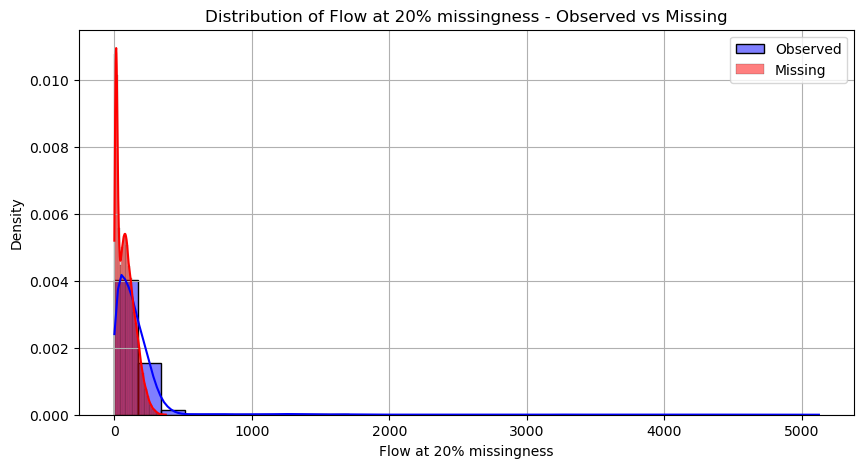

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_missing_vs_observed(data, mask, feature_name="flow"):
    """
    data: 1D array of original values
    mask: 1D boolean array, True if missing
    feature_name: for labeling
    """
    data_missing = data[mask]
    data_observed = data[~mask]

    plt.figure(figsize=(10, 5))
    sns.histplot(data_observed, color='blue', label='Observed', kde=True, stat="density", bins=30)
    sns.histplot(data_missing, color='red', label='Missing', kde=True, stat="density", bins=30)
    plt.title(f"Distribution of {feature_name} - Observed vs Missing")
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_missing_vs_observed(X_val_full_unscaled_seq_tensor[0].flatten(), val_masks_seq[0][99].flatten(), feature_name="Flow at 20% missingness")

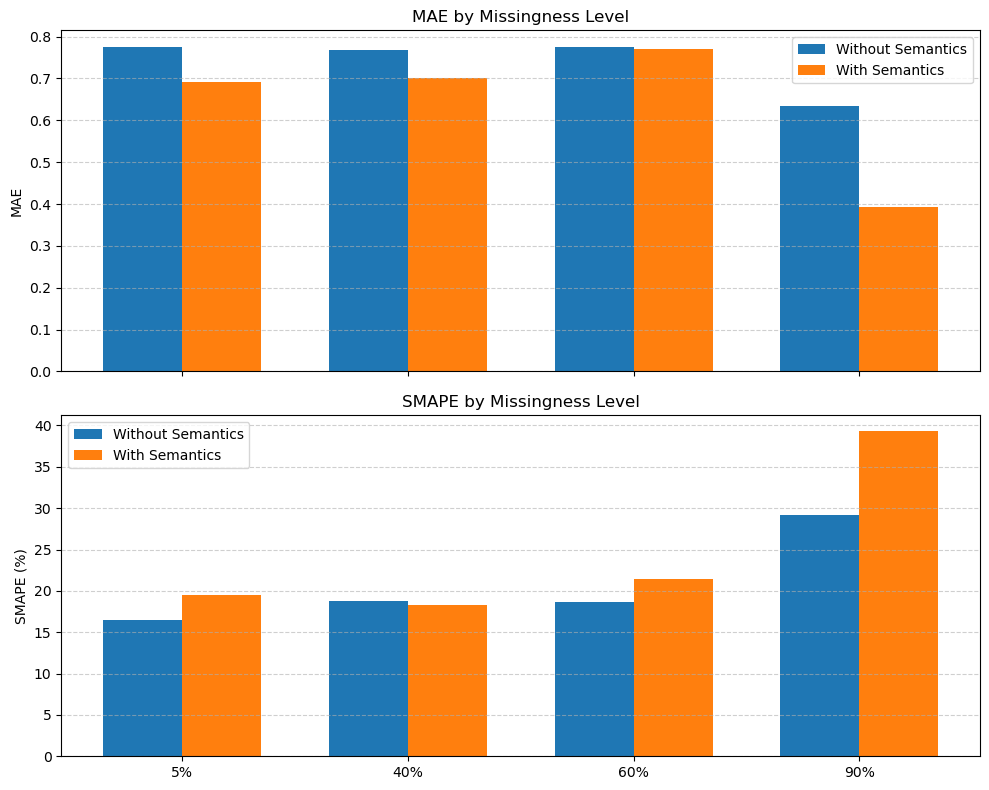

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Missingness levels
missing_levels = ['5%', '40%', '60%', '90%']

# Bar chart setup
x = np.arange(len(missing_levels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- MAE plot ---
ax[0].bar(x - width/2, r2_all.values(), width, label='Without Semantics', color='tab:blue')
ax[0].bar(x + width/2, avg_r2_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE by Missingness Level')
ax[0].legend()
ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# --- SMAPE plot ---
ax[1].bar(x - width/2, smape_all.values(), width, label='Without Semantics', color='tab:blue')
ax[1].bar(x + width/2, avg_smape_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[1].set_ylabel('SMAPE (%)')
ax[1].set_title('SMAPE by Missingness Level')
ax[1].set_xticks(x)
ax[1].set_xticklabels(missing_levels)
ax[1].legend()
ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()
